In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_C.csv')

In [3]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [4]:
columnsDrop = ['id','Unnamed: 0', 'CustomerId', 'Surname', 'Geography' ]

df = df.drop(columnsDrop, axis = 1)

In [5]:
df.shape

(41258, 10)

In [6]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41246 non-null  float64
 1   Gender           41258 non-null  object 
 2   Age              41258 non-null  float64
 3   Tenure           41258 non-null  int64  
 4   Balance          41258 non-null  float64
 5   NumOfProducts    41258 non-null  int64  
 6   HasCrCard        41258 non-null  int64  
 7   IsActiveMember   41258 non-null  int64  
 8   EstimatedSalary  41258 non-null  float64
 9   churn            41258 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 3.1+ MB


In [8]:
for (columnName, columnData) in df.items():
    na_count = columnData.isna().sum()
    unique_count = columnData.unique()
    print(f'{columnName}\'s data type: {columnData.dtypes}')
    print(f'N/A values in {columnName}: {na_count}')
    print(f'{columnName} values: {unique_count}\n')

CreditScore's data type: float64
N/A values in CreditScore: 12
CreditScore values: [628. 710. 663. 644. 627. 754. 616. 477. 526. 597. 745. 705. 648. 718.
 619. 738. 576. 438. 792. 646. 579. 652. 494. 602. 679. 850. 733. 803.
 769. 645. 635. 714. 634. 651. 551. 739. 668. 517. 709. 547. 702. 712.
 540. 611. 834. 682. 683. 691. 755. 641. 764. 765. 583. 511. 716. 676.
 565. 460. 711. 643. 704. 621. 592. 695. 677. 743. 622. 749. 593. 678.
 752. 697. 633. 584. 666. 767. 581. 814. 647. 757. 667. 690. 638. 632.
 516. 637. 613. 624. 686. 721. 594. 588. 656. 573. 715. 732. 655. 670.
 788. 730. 556. 658. 590. 726. 653. 629. 489. 604. 729. 485. 614. 684.
 707. 773. 717. 609. 615. 587. 603. 585. 687. 636. 544. 630. 833. 562.
 829. 535. 564. 598. 681. 612. 751. 762. 831. 794. 591. 815. 548. 825.
 659. 538. 694. 756. 596. 521. 753. 497. 849. 528. 639. 502. 662. 708.
 693. 775. 549. 567. 507. 724. 713. 685. 783. 431. 796. 680. 527. 649.
 706. 492. 748. 758. 671. 595. 557. 774. 696. 474. 539. 689. 582.

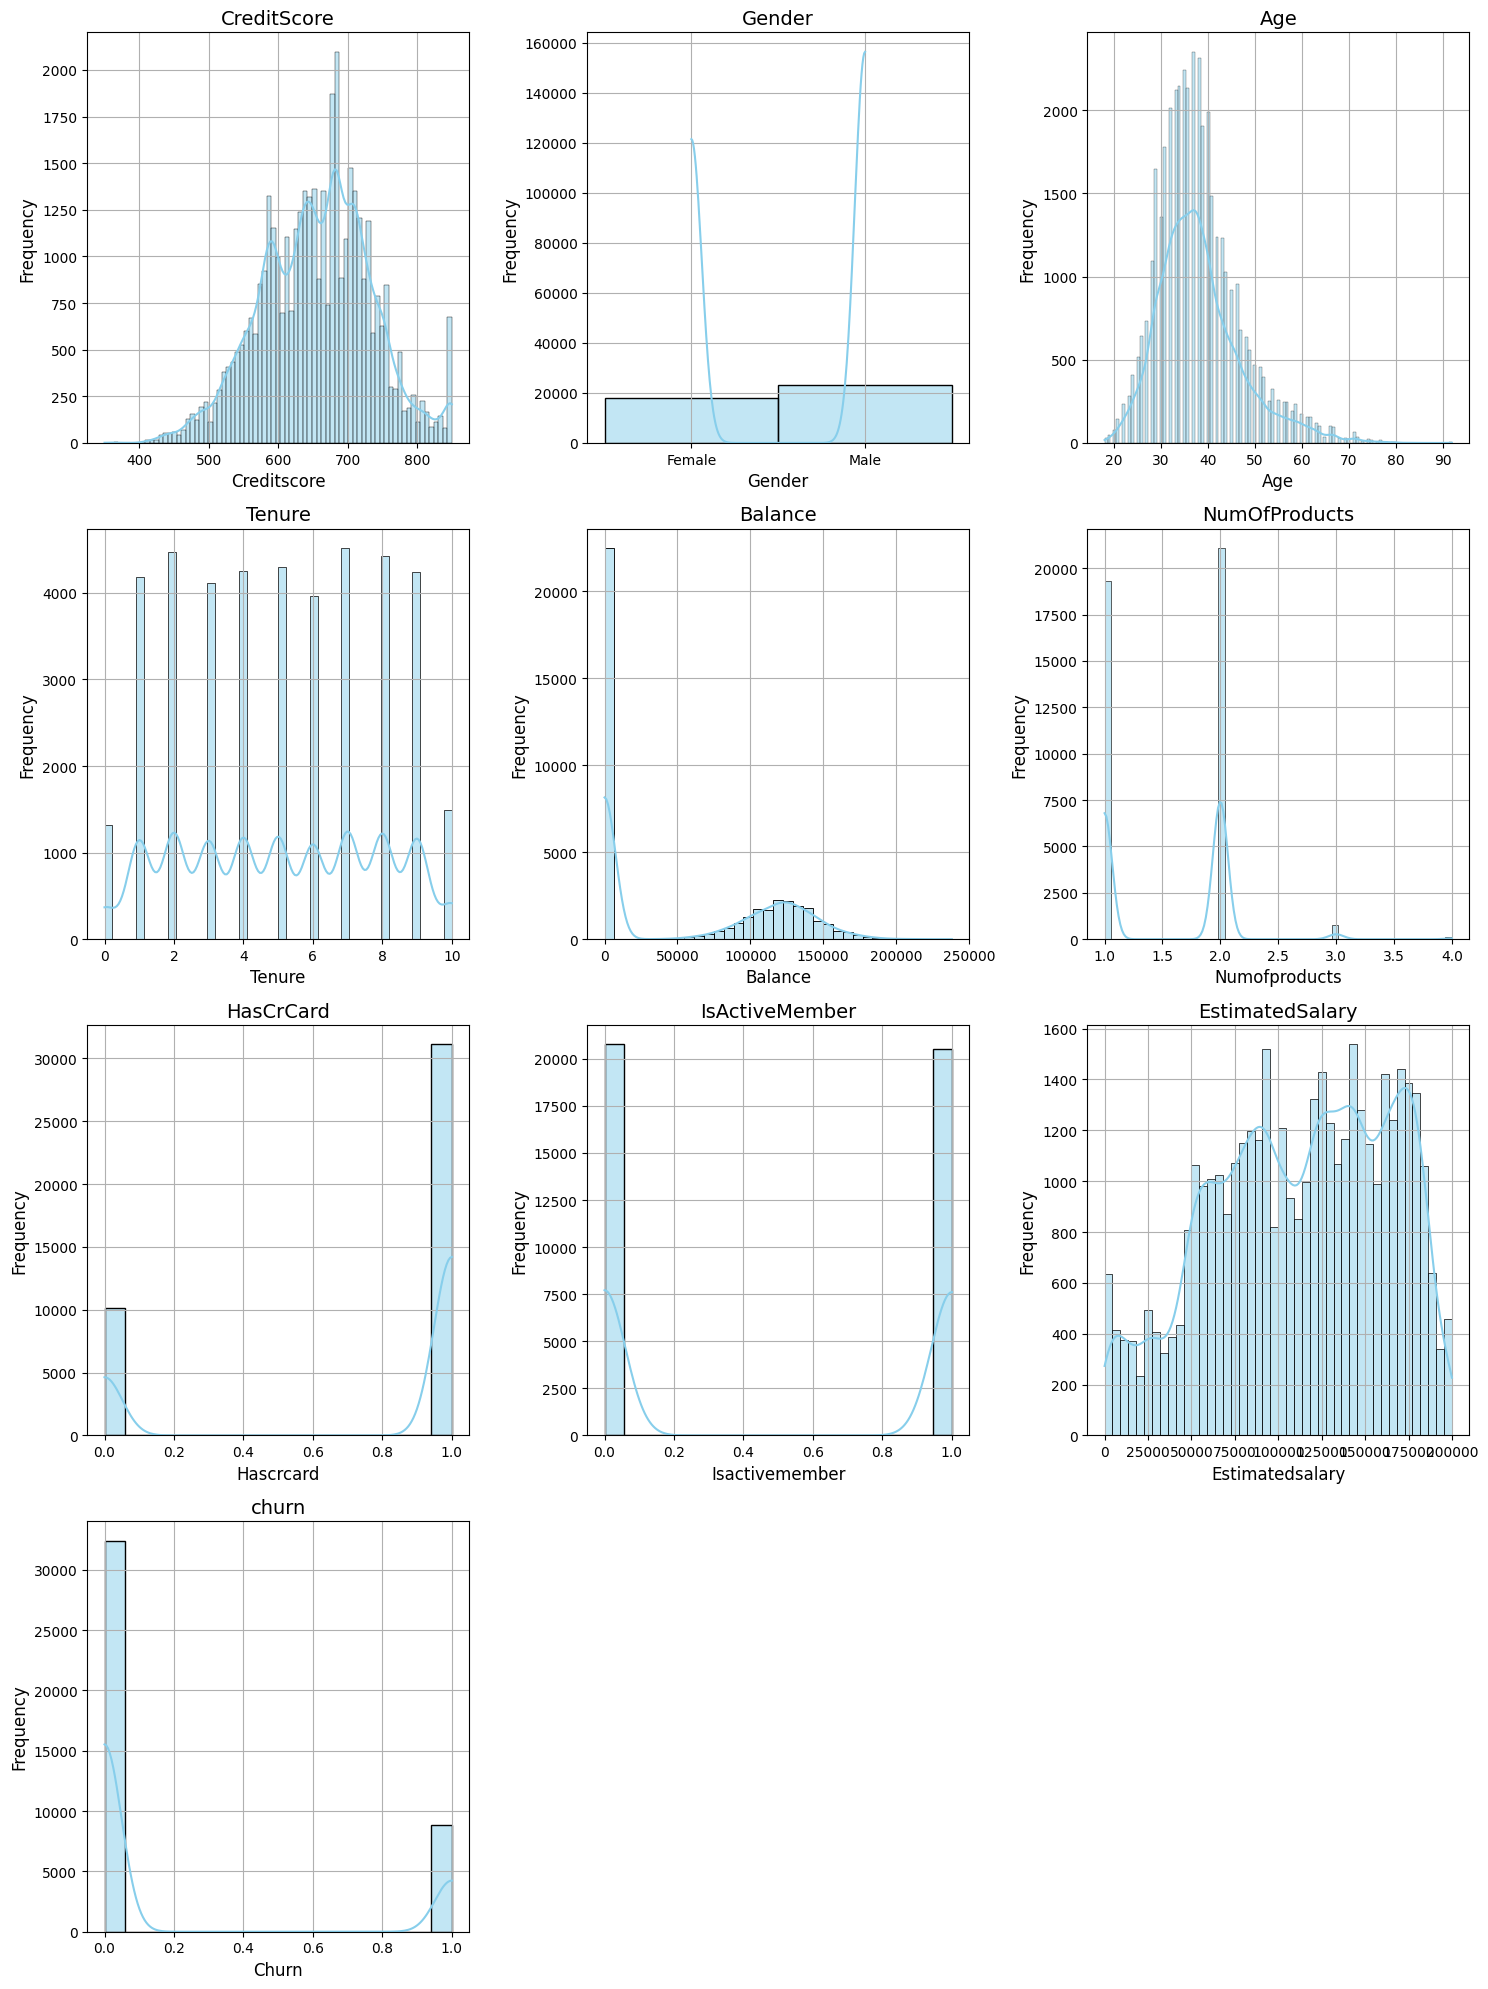

In [9]:
import seaborn as sns

num_cols = len(df.columns)

num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

for j in range(num_cols, num_rows * 3):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

In [10]:
df['Age'].value_counts()

Age
37.00    2351
38.00    2317
35.00    2241
34.00    2148
36.00    2135
         ... 
83.00       1
84.00       1
85.00       1
36.44       1
81.00       1
Name: count, Length: 71, dtype: int64

In [11]:
df['Age'] = df['Age'].astype('int')

In [12]:
df['Age'].value_counts()

Age
37    2351
38    2317
35    2241
34    2148
36    2136
      ... 
82       2
83       1
84       1
85       1
81       1
Name: count, Length: 69, dtype: int64

In [13]:
median_credit_score = df['CreditScore'].median()

df['CreditScore'].fillna(median_credit_score, inplace=True)

C:\Users\nsnic\AppData\Local\Temp\ipykernel_10500\1503137163.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CreditScore'].fillna(median_credit_score, inplace=True)


In [14]:
df['CreditScore'].isna().sum()

0

In [15]:
df['Gender'].value_counts()

Gender
Male      23219
Female    18039
Name: count, dtype: int64

In [16]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
gender_encode = {"Gender": {"Male":1,"Female" :0}}
cr_card_encode = {"HasCrCard": {"Yes":1,"No":0}}
act_member__encode = {"IsActiveMember": {"Yes":1,"No":0}}

C:\Users\nsnic\AppData\Local\Temp\ipykernel_10500\1694100077.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


In [19]:
import pickle as pkl
filename = 'gender_encode.pkl'
pkl.dump(gender_encode, open(filename, 'wb'))

filename = 'cr_card_encode.pkl'
pkl.dump(cr_card_encode, open(filename, 'wb'))

filename = 'act_member__encode.pkl'
pkl.dump(act_member__encode, open(filename, 'wb'))

In [20]:
df['churn'].value_counts()

churn
0    32410
1     8848
Name: count, dtype: int64

In [21]:
input_df=df.drop('churn',axis=1)
output_df=df['churn']

In [22]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41258 non-null  float64
 1   Gender           41258 non-null  int64  
 2   Age              41258 non-null  int32  
 3   Tenure           41258 non-null  int64  
 4   Balance          41258 non-null  float64
 5   NumOfProducts    41258 non-null  int64  
 6   HasCrCard        41258 non-null  int64  
 7   IsActiveMember   41258 non-null  int64  
 8   EstimatedSalary  41258 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 2.7 MB


In [23]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

input_df = scaler.fit_transform(input_df)

In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to input dataframe
smote = SMOTE(random_state=42)
df_input_oversampled, df_output_oversampled = smote.fit_resample(input_df, output_df)


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_input_oversampled, df_output_oversampled, test_size = 0.2, random_state = 42)

In [26]:
output_df[output_df == 1].count()

8848

In [27]:
y_train[y_train == 1].count() / 8848

2.9382911392405062

In [28]:
y_test[y_test == 1].count() / 8848

0.7246835443037974

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8], 
}

In [30]:
from sklearn.ensemble import RandomForestClassifier
import warnings

RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)  

In [31]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'log_loss', 'max_depth': 8}
Accuracy : 0.8219299376844484


In [32]:
RF_class_best = RandomForestClassifier(criterion= 'gini',max_depth=8)

In [33]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [34]:
y_predict_best = RF_class_best.predict(x_test)

In [35]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6552
           1       0.82      0.83      0.82      6412

    accuracy                           0.82     12964
   macro avg       0.82      0.82      0.82     12964
weighted avg       0.82      0.82      0.82     12964



0.8243587744133596


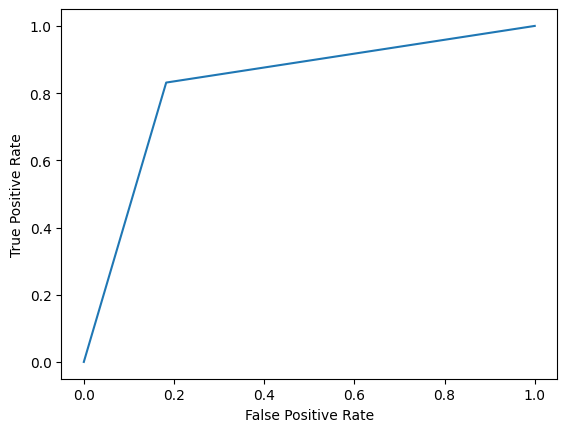

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_predict_best)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test, y_predict_best))
plt.show()

In [37]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

In [38]:
grid_search = GridSearchCV(estimator=xgb_classifier, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='accuracy')

In [39]:
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best score: 0.8851820886061962


In [40]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [41]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6552
           1       0.90      0.87      0.89      6412

    accuracy                           0.89     12964
   macro avg       0.89      0.89      0.89     12964
weighted avg       0.89      0.89      0.89     12964



0.8892294629194192


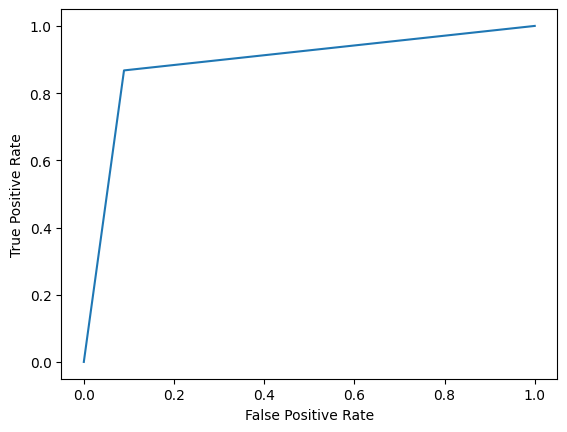

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test, y_pred))
plt.show()

In [43]:
import pickle as pkl
filename = 'RF_class.pkl'
pkl.dump(RF_class_best, open(filename, 'wb'))

In [44]:
import pickle as pkl
filename = 'XG-class.pkl'
pkl.dump(best_model, open(filename, 'wb'))